### Titanic-Dataset

#### Import Libraries

In [7]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve,fbeta_score,make_scorer

from sklearn.metrics import roc_curve

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier

random_seed = 1
np.random.seed(random_seed)

#### Load Data

In [8]:
df = pd.read_csv("train.csv")

### Exploring Dataset

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Size of the data

In [10]:
df.shape

(891, 12)

#### Type of data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Cleaning dataset

#### Drop columns that are not interested in

In [12]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

#### Checking for missing value

In [13]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### Imputing missing values

In [14]:
Age_mean = df['Age'].mean()

df.Age = df.Age.fillna(value=Age_mean)
df=df.dropna()

In [15]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Convert categorical variables 

In [17]:
df.Sex = df.Sex.replace("male", 1, regex=True)
df.Sex = df.Sex.replace("female", 0, regex=True)
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


#### Default Train-Test split

In [12]:
train_set, test_set = train_test_split(df) #default 75-25

### Visualize the data

#### Relation between Gender and Survival

/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:xlabel='Survived', ylabel='count'>

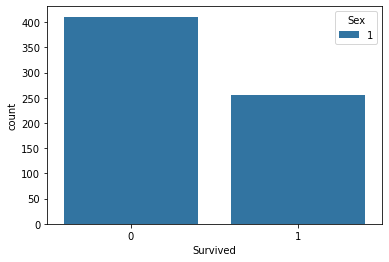

In [13]:
sns.countplot("Survived", data=train_set,hue="Sex")

<AxesSubplot:xlabel='Age', ylabel='Count'>

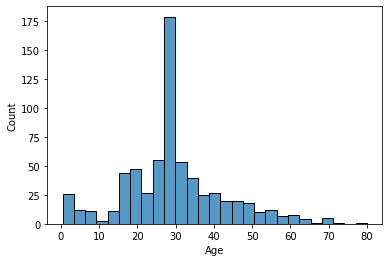

In [14]:
sns.histplot(data = train_set['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

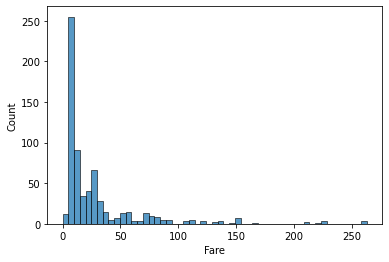

In [15]:
sns.histplot(data = train_set['Fare'])

/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

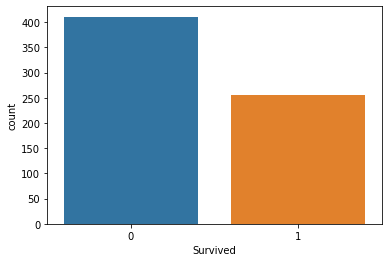

In [16]:
sns.countplot(train_set.Survived)

#### Scale Dataset

In [17]:
# Split the train set and test set into indepedent variables and dependent variable
x_train = train_set.drop(columns = ['Survived'])
y_train = train_set['Survived']

x_test = test_set.drop('Survived', axis = 1) # axis = 1 means in the column ... like rows in axis=0
y_test = test_set['Survived']

In [18]:
# Scale the dataset
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### Knn model

In [19]:
# Initiate the model
model = RandomForestClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions
prediction = model.predict(x_test)


print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, prediction):.3f}")

# Evaluate the model
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

Accuracy Score:   0.673
[[99 39]
 [34 51]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       138
           1       0.57      0.60      0.58        85

    accuracy                           0.67       223
   macro avg       0.66      0.66      0.66       223
weighted avg       0.68      0.67      0.67       223



In [20]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,(30*2),2)),
    'metric': ['euclidean', 'cosine']
}
gridSearchBestKnn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearchBestKnn.fit(x_train, y_train)
y_pred = gridSearchBestKnn.predict(x_test)
print(score_measure, 'score: ', gridSearchBestKnn.best_score_)
print('parameters: ', gridSearchBestKnn.best_params_)

bestRecallKnn = gridSearchBestKnn.best_estimator_

accuracy score:  0.7373134328358208
parameters:  {'metric': 'cosine', 'n_neighbors': 41}


### Random Forest

In [21]:
%%time
score_measure = 'accuracy'
k_fold = 10
param_grid = {
    'max_depth': [2,5,3,4,7,8], 
    'min_samples_split': [20,30, 40,50, 60], 
    'min_impurity_decrease': [ 0.001, 0.0005, 0.0007,0.0003], 
}
gridSearchRF = GridSearchCV(RandomForestClassifier(random_state=random_seed), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)

gridSearchRF.fit(x_train, y_train)
y_pred = gridSearchRF.predict(x_test)
print(score_measure, 'score: ', gridSearchRF.best_score_)
print('parameters: ', gridSearchRF.best_params_)

accuracy score:  0.7297602894617821
parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.0007, 'min_samples_split': 20}
CPU times: user 1.52 s, sys: 151 ms, total: 1.68 s
Wall time: 17.8 s


### MLP

In [22]:
score_measure = 'accuracy'
param_grid = {
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['sgd','adam']
}
gridSearchAnn = GridSearchCV(MLPClassifier(hidden_layer_sizes=(100,50,), max_iter=20000), param_grid, scoring=score_measure, n_jobs=-1)

gridSearchAnn.fit(x_train, y_train)

y_pred = gridSearchAnn.predict(x_test)
print(score_measure, 'score: ', gridSearchAnn.best_score_)
print('parameters: ', gridSearchAnn.best_params_)

accuracy score:  0.7357311188418808
parameters:  {'activation': 'relu', 'solver': 'sgd'}


### XGBoost

In [23]:
%%time
score_measure = 'accuracy'
k_fold = 10
param_grid = {
    'max_depth': (1,2,3),
    'max_leaves': (1,2,3),
    'learning_rate': (0.1,0.15),
}
gridSearchXGB = GridSearchCV(XGBClassifier(random_state=random_seed, use_label_encoder = False, eval_metric='mlogloss'), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)
gridSearchXGB.fit(x_train, y_train)
y_pred = gridSearchXGB.predict(x_test)
print(score_measure, 'score: ', gridSearchXGB.best_score_)
print('parameters: ', gridSearchXGB.best_params_)

/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use p

accuracy score:  0.7191542288557213
parameters:  {'learning_rate': 0.1, 'max_depth': 1, 'max_leaves': 1}
CPU times: user 534 ms, sys: 140 ms, total: 674 ms
Wall time: 28.7 s


### Gradient Boost

In [24]:
%%time
score_measure = 'accuracy'
k_fold = 10
param_grid = {
    'n_estimators': (2,3,5),
    'learning_rate': (0.1,0.2,0.3,0.4,0.5)
}
gridSearchGB = GridSearchCV(GradientBoostingClassifier(random_state=random_seed), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)
gridSearchGB.fit(x_train, y_train)
y_pred = gridSearchGB.predict(x_test)
print(score_measure, 'score: ', gridSearchGB.best_score_)
print('parameters: ', gridSearchGB.best_params_)

accuracy score:  0.7116915422885572
parameters:  {'learning_rate': 0.5, 'n_estimators': 2}
CPU times: user 225 ms, sys: 93.8 ms, total: 319 ms
Wall time: 149 ms


### Decision tree

In [25]:

score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearchBestDT = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearchBestDT.fit(x_train, y_train)
y_pred = gridSearchBestDT.predict(x_test)
print(score_measure, 'score: ', gridSearchBestDT.best_score_)
print(f"{'Best Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print('parameters: ', gridSearchBestDT.best_params_)

accuracy score:  0.6965626413387608
Best Accuracy Score: 0.682
parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 40}


### Summary

### Max accuracy in MLP with accuracy value =  0.7357311188418808